<font size="5">Imports</font>

In [34]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

<font size="5">Read excel file 'active_fighters_by_country.xlsx'</font>

In [35]:
# Excel file obtained by scrapping UFC website. See ufc_stats_4.5.py for script.
df_fighters_country = pd.read_excel('active_fighters_by_country.xlsx',
                           usecols=['FighterName', 'Country']
                           )

df_fighters_country.head(5)

,FighterName,Country
0,GUIDO CANNETTI,Argentina
1,SILVANA JUAREZ,Argentina
2,ARMEN PETROSYAN,Armenia
3,JESSICA-ROSE CLARK,Australia
4,JIMMY CRUTE,Australia


<font size="5">Obtain count of fighters by country.</font>

In [36]:
df_country_counts = df_fighters_country.groupby(['Country']).count()
df_country_counts.head(10)

,FighterName
Country,
Argentina,2
Armenia,1
Australia,13
Austria,1
Brazil,79
Bulgaria,1
Canada,18
China,12
Czechia,2


In [37]:
df_country_counts['Country'] = df_country_counts.index
df_country_counts.rename(columns={'FighterName': 'CountFighters'},
                        inplace=True)

print(df_country_counts.shape)
df_country_counts.head(5)

(53, 2)


,CountFighters,Country
Country,,
Argentina,2,Argentina
Armenia,1,Armenia
Australia,13,Australia
Austria,1,Austria
Brazil,79,Brazil


<font size="5">Plot</font>

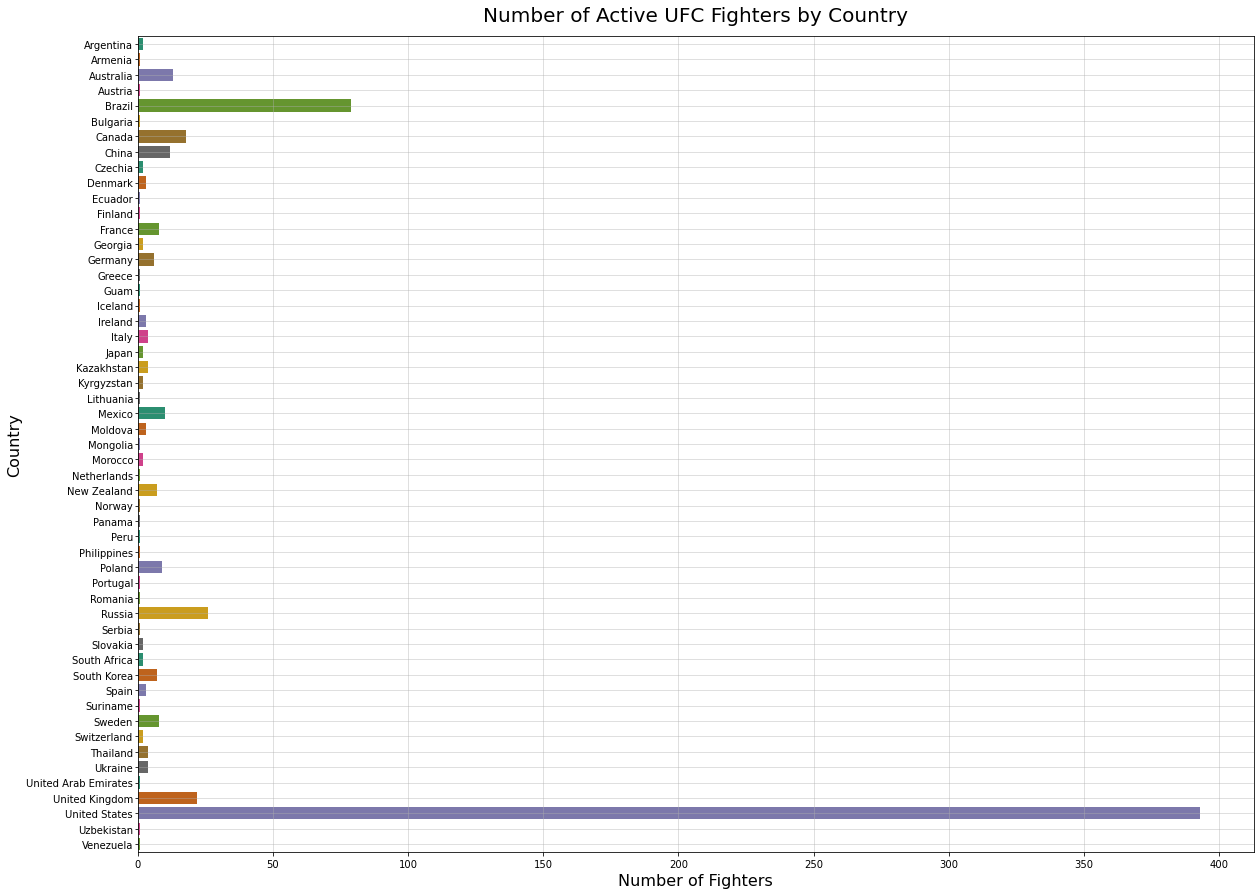

In [38]:
fig = plt.subplots(figsize=(20,15))

ax = sns.barplot(x='CountFighters', y='Country', data=df_country_counts,
                palette=sns.color_palette("Dark2")
                ) 

plt.grid(alpha=0.5)
ax.tick_params(axis='y', pad=1)

plt.title('Number of Active UFC Fighters by Country', fontsize=20, pad=15)
plt.xlabel('Number of Fighters', fontsize=16)
plt.ylabel('Country', fontsize=16)

plt.savefig('Number_of_Active_UFC_Fighters_by_Country.jpg')
plt.show()

<font size="5">Bring in the Fight Records DataFrame</font>
<br>
<font size="5">Idea is to analyze and make more indepth charts based on records (W-L-D).</font>

In [39]:
df_fight_records = pd.read_excel('active_fighters_by_country.xlsx',
                                usecols=['Country', 'Wins', 'Losses', 'Draws'])
df_fight_records.head(5)

,Country,Wins,Losses,Draws
0,Argentina,9,7,0
1,Argentina,6,4,0
2,Armenia,7,1,0
3,Australia,11,7,0
4,Australia,12,3,0


<font size="5">Scatter plots of wins and losses (x,y) by country.</font>

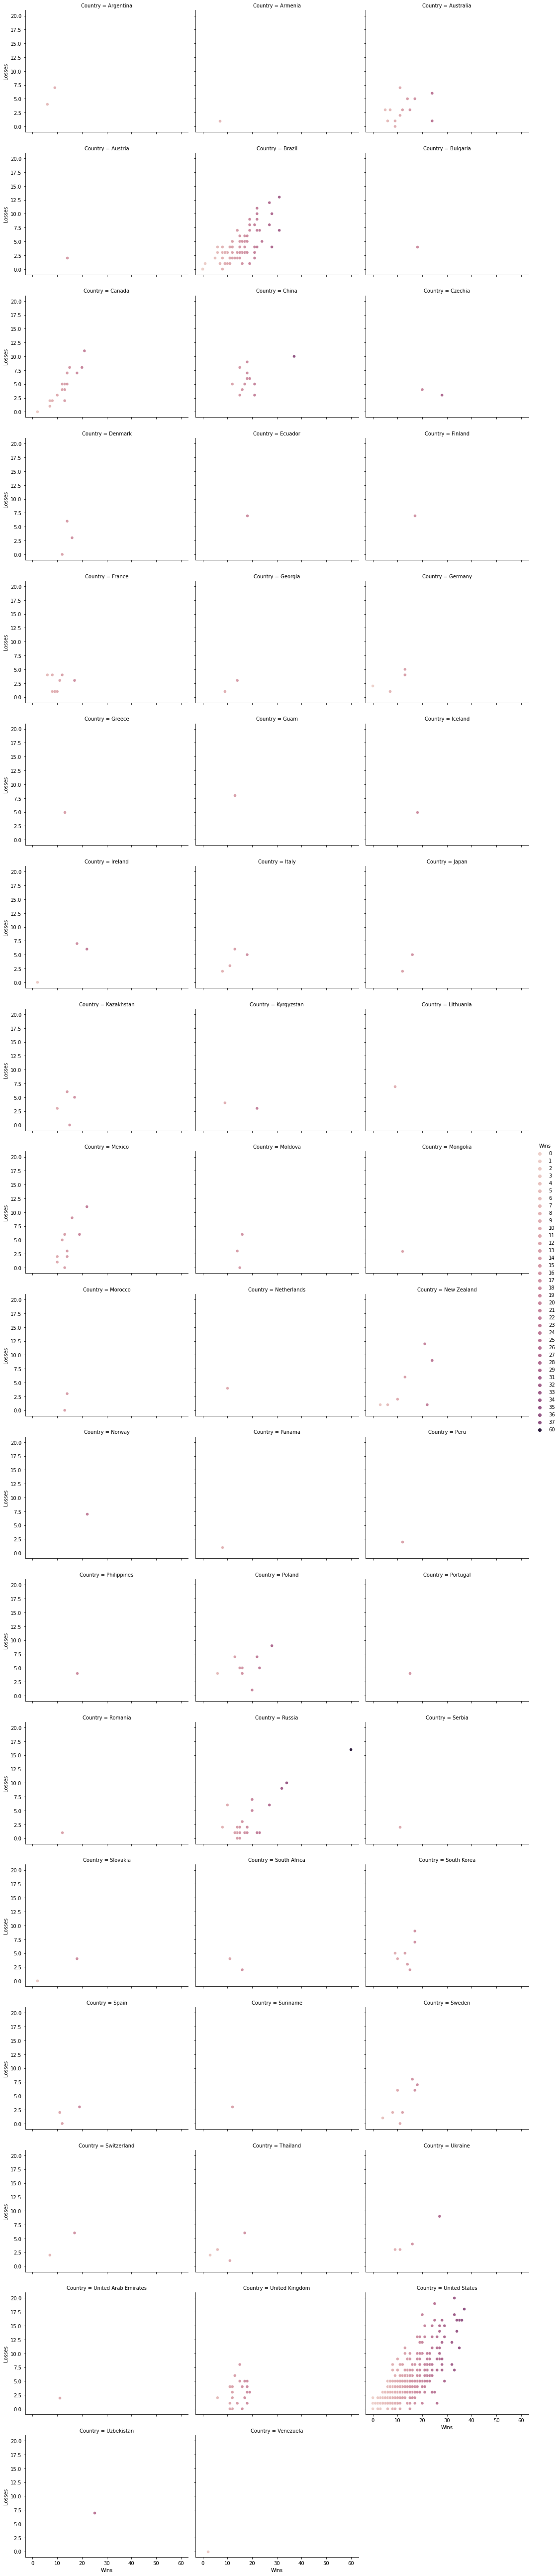

In [40]:
g = sns.relplot(data=df_fight_records, kind='scatter', height=4, aspect=1.25,
           x='Wins', y='Losses', col='Country', col_wrap=3, hue='Wins', legend='full')

In [41]:
df_fight_records_count = df_fight_records.groupby(['Country'], as_index=True).sum()
print(df_fight_records_count.shape)
df_fight_records_count.head(10)

(53, 3)


,Wins,Losses,Draws
Country,,,
Argentina,15,11,0
Armenia,7,1,0
Australia,164,40,1
Austria,14,2,0
Brazil,1107,315,21
Bulgaria,18,4,0
Canada,226,83,4
China,227,71,2
Czechia,48,7,1


<font size="5">Pull DataFrame for Individual Stats</font>

In [42]:
df_individual = pd.read_excel('active_fighters_by_country.xlsx')
df_individual.head(5)

,Unnamed: 0,index,FighterName,Country,AthletePageLink,FighterRecord,Wins,Losses,Draws
0,0,0,GUIDO CANNETTI,Argentina,https://www.ufc.com/athlete/guido-cannetti,9-7-0,9,7,0
1,1,1,SILVANA JUAREZ,Argentina,https://www.ufc.com/athlete/silvana-juarez,6-4-0,6,4,0
2,2,0,ARMEN PETROSYAN,Armenia,https://www.ufc.com/athlete/armen-petrosyan,7-1-0,7,1,0
3,3,0,JESSICA-ROSE CLARK,Australia,https://www.ufc.com/athlete/jessica-rose-clark,11-7-0,11,7,0
4,4,1,JIMMY CRUTE,Australia,https://www.ufc.com/athlete/jim-crute,12-3-0,12,3,0


In [43]:
df_individual.drop(columns=['Unnamed: 0', 'index', 'FighterRecord'], inplace=True)
df_individual.head(5)

,FighterName,Country,AthletePageLink,Wins,Losses,Draws
0,GUIDO CANNETTI,Argentina,https://www.ufc.com/athlete/guido-cannetti,9,7,0
1,SILVANA JUAREZ,Argentina,https://www.ufc.com/athlete/silvana-juarez,6,4,0
2,ARMEN PETROSYAN,Armenia,https://www.ufc.com/athlete/armen-petrosyan,7,1,0
3,JESSICA-ROSE CLARK,Australia,https://www.ufc.com/athlete/jessica-rose-clark,11,7,0
4,JIMMY CRUTE,Australia,https://www.ufc.com/athlete/jim-crute,12,3,0


<font size="5">ALEKSEI OLEINIK has the most wins amongst active UFC fighters.</font>

In [44]:
m = df_individual['Wins'].max()
print(m)
q = f"Wins == {m}"
df_individual.query(q)

60


,FighterName,Country,AthletePageLink,Wins,Losses,Draws
224,ALEKSEI OLEINIK,Russia,https://www.ufc.com/athlete/aleksei-oleinik,60,16,1
